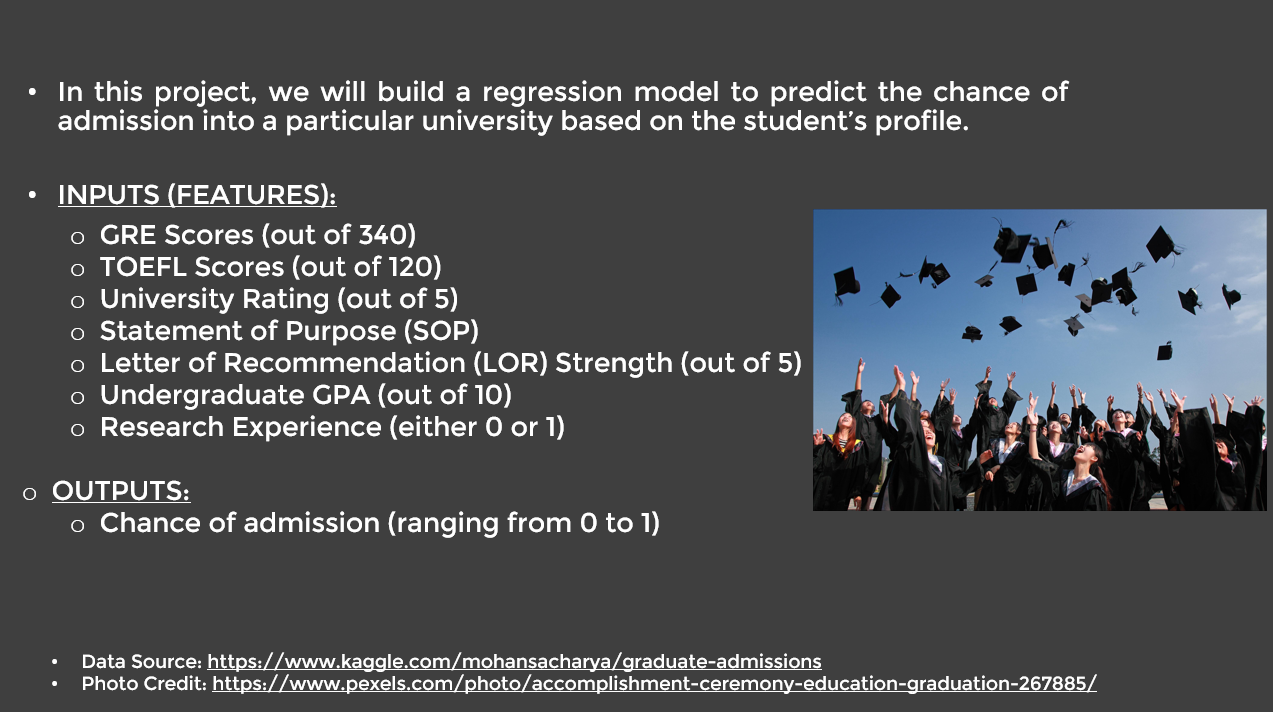

## IMPORT LIBRARIES AND DATASET

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
admission_df = pd.read_csv("../input/admission-predict/Admission_Predict.csv")

In [ ]:
admission_df.head()

In [ ]:
admission_df.shape


In [ ]:
# Droping the serial no. column

admission_df.drop("Serial No.", axis= 1, inplace = True)
admission_df.head()

## PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
#Checking for null values

admission_df.isnull().sum()


# SO there is no null value in any column

In [ ]:
#Statistical Summary of dataframe

admission_df.describe()

In [ ]:
# Grouping by University Ranking

df_university = admission_df.groupby(by = 'University Rating').mean()

df_university

## PERFORM DATA VISUALIZATION

In [ ]:
admission_df.hist(bins = 30, figsize=(20,20), color = 'r')

In [ ]:
sns.pairplot(admission_df)

In [ ]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(13,9))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## CREATE TRAINING AND TESTING DATASET

In [ ]:
admission_df.columns


In [ ]:
X = admission_df.drop(columns=['Chance of Admit'])

In [ ]:
X.head(1)

In [ ]:
y = admission_df['Chance of Admit']

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
y = y.reshape(-1,1)

In [ ]:
y.shape

In [ ]:
X

# UNSCALED

In [ ]:
# scaling the data before training the model

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [ ]:
X

#SCALED

In [ ]:
scaler_y = StandardScaler()

y = scaler_y.fit_transform(y)

In [ ]:
# Splitting the data into testing and training sets

from sklearn.model_selection import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20
                                                    )

## TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LinearRegression_model = LinearRegression()

In [ ]:
LinearRegression_model.fit(X_train, y_train)

In [ ]:
# Evaluating

from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)

In [ ]:
accuracy_LinearRegression

# around 87% accurate on the test date ie data never seen

## TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [ ]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
ANN_model = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(50, input_dim = 7, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='linear'),
    tf.keras.layers.Dense(1)
    
    ])

In [ ]:
ANN_model.compile(loss = 'mse', optimizer = 'adam')

In [ ]:
ANN_model.summary()

In [ ]:
epochs_hist = ANN_model.fit(X_train,y_train, epochs = 100, batch_size = 20)

In [ ]:
result = ANN_model.evaluate(X_test, y_test)

In [ ]:
accuracy_ANN_model = 1-result

In [ ]:
print("Accuracy :{}".format(accuracy_ANN_model))

#about 85% accurate

In [ ]:
epochs_hist.history.keys()

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

## TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

- Decision Tree builds regression or classification models in the form of a tree structure.
- DT breaks down a dataset into smaller subsets 
- The final result is a tree with decision nodes and lead nodes

- Many DTs make up a __Random Forest__ model which is an essemble model.
- Predictions made by each DT are averaged to get the prediction of random forest model.
- Random Forest Regressor fits a number of classifying DTs on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

In [ ]:
DecisionTree_model = DecisionTreeRegressor()

In [ ]:
DecisionTree_model.fit(X_train, y_train)

In [ ]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)

In [ ]:
accuracy_DecisionTree

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor


In [ ]:
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth= 10)

In [ ]:
RandomForest_model.fit(X_train, y_train)

In [ ]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)

In [ ]:
accuracy_RandomForest

In [ ]:
print("Accuracy Score of Linear Regression model: {}".format(accuracy_LinearRegression))

print("Accuracy Score of Artificial Neural Network model: {}".format(accuracy_ANN_model))

print("Accuracy Score of Decision Tree model: {}".format(accuracy_DecisionTree))

print("Accuracy Score of Random Forest model: {}".format(accuracy_RandomForest))

# Here we see that Multiple Linear Regressor out-perform the non-linear complex models

## CALCUATING REGRESSION MODEL KPIs

In [ ]:
# Plot for values after applying the Standard Scaler ie Scaled Values

y_predict = LinearRegression_model.predict(X_test)

In [ ]:
plt.plot(y_test, y_predict, '^', color ='orange')

In [ ]:
# Plot for origional values before applying Std Scaler ie Unscaled Values

y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [ ]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'green')

In [ ]:
# K and n are required to calculate errors 
# K is for R square Adjusted


k = X_test.shape[1]  # no of independent variables
n = len(X_test)      # no of samples
n

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
print("Mean Absolute Error = {} ". format(MAE))

In [ ]:
MSE = mean_squared_error(y_test_orig, y_predict_orig)
print("Mean Squared Error = {} ". format(MSE))

In [ ]:
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error = {} ". format(RMSE))

In [ ]:
r2 = r2_score(y_test_orig, y_predict_orig)
print("R Squared or Coefficient of determination = {} ". format(r2))

In [ ]:
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print("Adjusted R Square = {} ". format(adj_r2))

**Reference- Project Taught by Ryan Ahmed,Phd**